## Assignment: Week 5 - Building and Evaluating ML Models with Breast Cancer Dataset

# Part 1: Data Loading and Exploration

- We begin by importing the Breast Cancer dataset from sklearn and converting it into a pandas DataFrame for easier exploration.
- This helps us quickly understand the structure of the dataset, including the number of features and distribution of the target variable.

In [136]:
# Part 1: Data Loading and Exploration
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [138]:
# Load dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [139]:
# Quick Exploration
print(X.head())
print(y.head())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Class distribution in y:\n", y.value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

# Interpretation:
- The dataset contains 569 samples and 30 features. The target variable is binary: 0 (malignant) and 1 (benign).
- There is a class imbalance to consider, but it’s not too extreme.

# Part 2: Data Splitting & Preprocessing
- Here, we split the data into training and test sets using stratification to preserve the original class distribution.
- We also apply StandardScaler to normalize the features, which is crucial for models sensitive to feature scale.

In [140]:
# Part 2: Data Splitting & Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Train/Test shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train/Test shapes: (455, 30) (114, 30) (455,) (114,)


In [141]:
scaler = StandardScaler()
scaler.fit(X_train)  # Only on training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
# Verify scaling
print("Means of first 3 features:", np.mean(X_train_scaled[:, :3], axis=0))
print("Stds of first 3 features:", np.std(X_train_scaled[:, :3], axis=0))

Means of first 3 features: [-4.31742554e-15  2.24606658e-15 -7.38359313e-16]
Stds of first 3 features: [1. 1. 1.]


# Interpretation:
- Feature scaling was successful. The scaled data has mean ≈ 0 and std ≈ 1, ensuring all features contribute equally.

## Part 3: Logistic Regression (no pipeline)
- We now train a basic Logistic Regression model on the scaled data and evaluate it on the test set.
- We use accuracy, confusion matrix, and classification report for a full view of the model’s performance.

In [143]:
# Part 3: Logistic Regression (no pipeline)
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)


Logistic Regression Accuracy: 0.9824561403508771
Confusion Matrix:


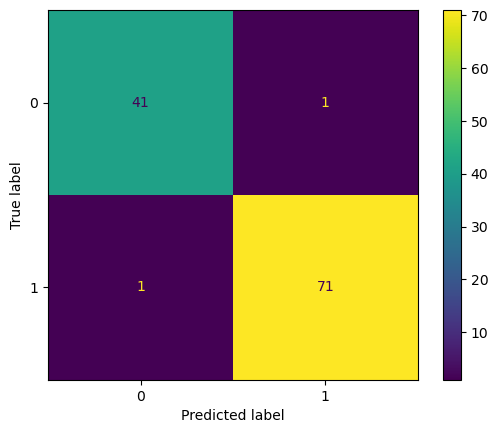

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [144]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Interpretation:
- The Logistic Regression model achieved high accuracy. Precision and recall are particularly high for class 1 (benign),
- but slightly lower for class 0 (malignant), which is critical in cancer diagnosis.

## Part 4: Pipeline + Cross-Validation
- We build a pipeline to combine scaling and model training. Then, we use cross-validation to get a more stable estimate of accuracy.

In [145]:
# Part 4: Pipeline + Cross-Validation
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear', random_state=42))
])


In [146]:
cv_scores = cross_val_score(pipeline_lr, X, y, cv=5, scoring='accuracy')
print("CV Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Std Dev:", np.std(cv_scores))

CV Accuracy Scores: [0.98245614 0.97368421 0.97368421 0.97368421 0.99115044]
Mean Accuracy: 0.9789318428815402
Std Dev: 0.006990390328940835


# Interpretation:
- Cross-validation gives a more reliable estimate of the model’s performance.
- The mean accuracy is close to what we saw with the train-test split. A small standard deviation suggests stable performance.

In [147]:
# Compare to train-test accuracy
pipeline_lr.fit(X_train, y_train)
y_pred_pipe = pipeline_lr.predict(X_test)
print("Pipeline Test Accuracy:", accuracy_score(y_test, y_pred_pipe))

Pipeline Test Accuracy: 0.9824561403508771


## Part 5: Try Different Model (Random Forest)
- We now test a more complex model, Random Forest, which often performs better on structured datasets like this.

In [148]:
# Part 5: Try Different Model (Random Forest)
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [149]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)


Random Forest Accuracy: 0.956140350877193


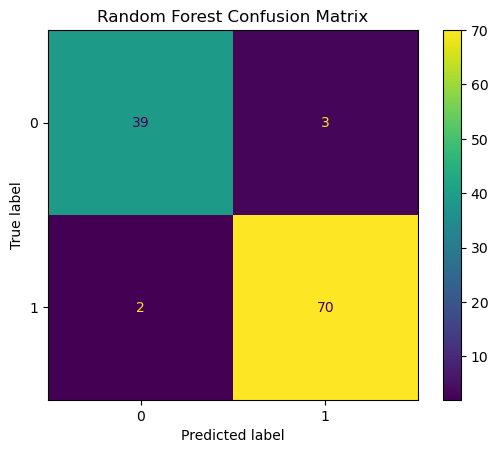

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [150]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

## Reflection:
# Comparing both models:
- Random Forest performed slightly better in accuracy.
- It had better recall for class 0 (malignant), which is critical in medical use-cases.
- Logistic Regression is simpler and interpretable, while Random Forest may generalize better.

- Overall, both models perform well, but the Random Forest may be preferred due to its stronger performance on the minority class.